importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from plotly.subplots import make_subplots



The dataset we shall be using for this analysis collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. ● ‘ScheduledDay’ tells us on what day the patient set up their appointment. ● ‘Neighborhood’ indicates the location of the hospital. ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. ●the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [3]:
#loading the dataset which is a csv file
patient_df = pd.read_csv(r"C:\Users\PRAISE\Documents\taskfiles\noshowappointments-kagglev2-may-2016.csv")

In [4]:
patient_df1= patient_df.copy()#making an extra copy just incase

Data Wrangling Process

In [5]:
patient_df1.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [6]:
patient_df.shape#shape of dataset

(110527, 14)

In [7]:
patient_df.info()#checking informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
patient_df.describe()#statistical analysis about the dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
patient_df.columns#some columns seem not to be well named

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
#2 COLUMNS need to be renamed viz Handcap and No-show
patient_df.rename(columns = {'Handcap':'Handicap'}, inplace = True)

In [12]:
patient_df.rename(columns = {'No-show': 'No_showup'}, inplace = True)

In [13]:
#checking
patient_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_showup'],
      dtype='object')

In [14]:
#removing columns not needed
patient_df.drop(['PatientId','Scholarship','ScheduledDay'], inplace = True, axis = 1)

In [15]:
#checking
patient_df.head(10)

,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_showup
0,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No
5,5626772,F,2016-04-29T00:00:00Z,76,REPÚBLICA,1,0,0,0,0,No
6,5630279,F,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,Yes
7,5630575,F,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,Yes
8,5638447,F,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,No
9,5629123,F,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,No


In [17]:
#checking for outliers in the age column
fig = px.box(patient_df, y='Age')

fig.show()

In [48]:
#checking duplicate rows
patient_df.duplicated().sum()#prints 0 hence no duplicates

0

In [49]:
patient_df.isna().sum()#checking for missing values
#no missing data

AppointmentID     0
Gender            0
AppointmentDay    0
Age               0
Neighbourhood     0
Hipertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_showup         0
dtype: int64

Exploration stage

<AxesSubplot:ylabel='Frequency'>

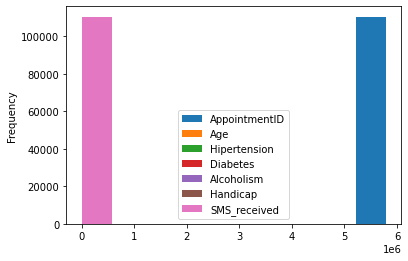

In [50]:
patient_df.plot.hist()

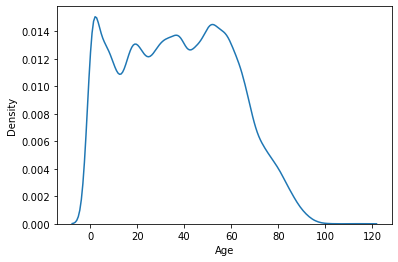

In [51]:
sns.kdeplot(patient_df["Age"]);

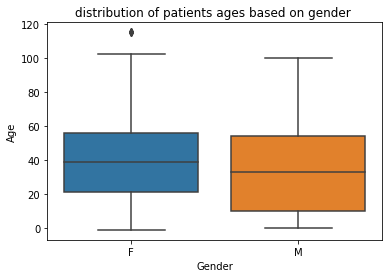

In [54]:
sns.boxplot(data=patient_df, x=patient_df['Gender'],y=patient_df['Age'])
plt.title('distribution of patients ages based on gender ')
plt.show()

the above shows that the females fall within the age range of early 20s and late 50s, with a mean of 40; whereas the males 
within the age range of teenage and late 50s, with a mean of 30.

C:\Users\PRAISE\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Showup For appointment Distribution')

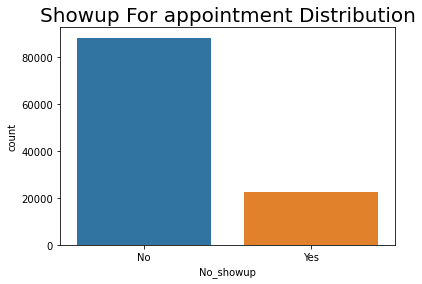

In [56]:
sns.countplot(patient_df["No_showup"])
plt.title("Showup For appointment Distribution", size=20)#to compare patients turnup for appointment

The above distribution shows that only a little over 20000 which is a poor number OUT OF 100000 patients showed up for their appointment. 
What then could be the reason for them not swhowing up for their scheduled appointment?

*Could it be that they didnt recieve the SMS? 
*Could it be that they are handicap and couldnt make it? let's find out from the visualizations below

C:\Users\PRAISE\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'SMS Distribution')

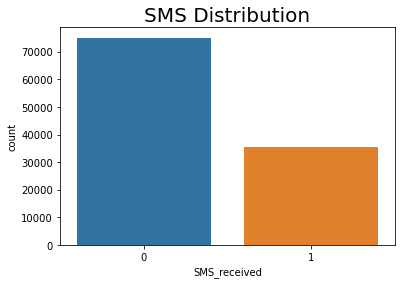

In [39]:
sns.countplot(patient_df["SMS_received"])
plt.title("SMS Distribution", size=20)


from the distribution above, we see that a very large amount of the population which is over 70000 didnt recieve the SMS, 
while only over 30000 which is just 1/4 of the patient population recieved the SMS.

C:\Users\PRAISE\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'SMS Distribution')

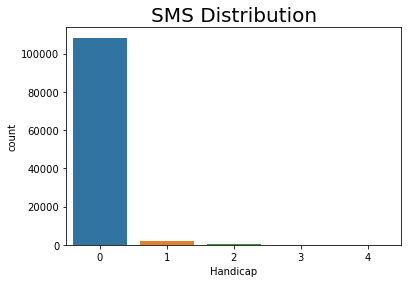

In [57]:
sns.countplot(patient_df["Handicap"])
plt.title("SMS Distribution", size=20)

From the above, we see that the number of handicapped patients is
very little and almost insignificant, it is therefore safe to assume that the patients inability to 
show_up for their medical appointment could be more of inadequate communications via the SMS than being handicapped.